<a href="https://colab.research.google.com/github/archanashokeeniitg/DataMining_Ass2/blob/main/DM_Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular DataSet - Iris 

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
iris_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/Iris.csv')
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.shape

(150, 6)

In [ ]:
X_variables = iris_df.iloc[:,1:5]
X_variables.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y_variable = iris_df.iloc[:,5]

## PCA

In [ ]:

sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [ ]:
pca = PCA()
pca = pca.fit(transformed_df)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

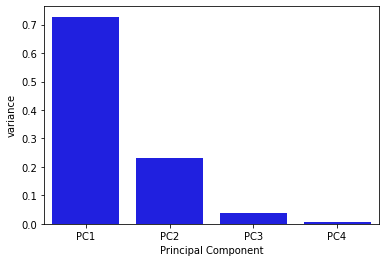

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

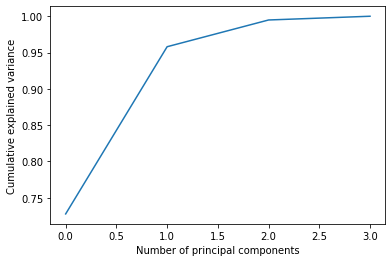

In [ ]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [ ]:
iris_df['Species'] = iris_df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

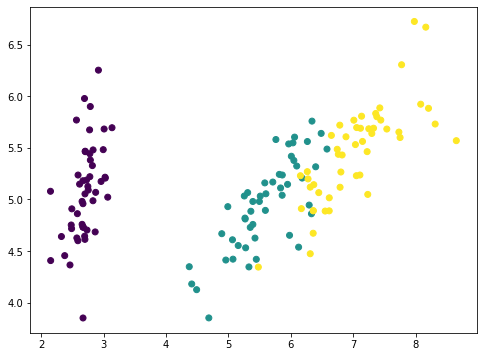

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=iris_df['Species'])
plt.show()

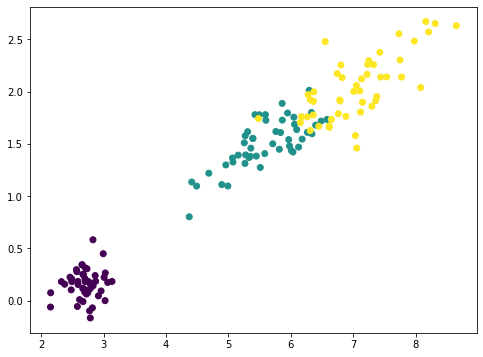

In [ ]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=iris_df['Species'])
plt.show()

## SVD

In [ ]:
print(transformed_df.shape)

#Applying SVD
u,s,v = np.linalg.svd(transformed_df, full_matrices=True)
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(variance_explained)

(150, 4)
[0.728 0.23  0.037 0.005]


Text(0, 0.5, '% of variance explained')

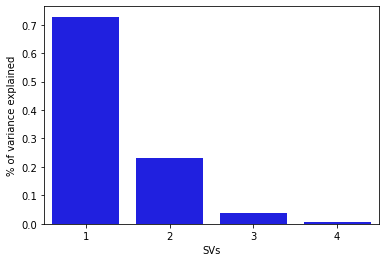

In [ ]:
#Plotting the variance
sns.barplot(x=list(range(1, len(variance_explained) + 1)), y=variance_explained, color="blue")
plt.xlabel("SVs")
plt.ylabel("% of variance explained")

In [ ]:
#Plotting the reduced data
col_lables = ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], columns=col_lables)
svd_df.head()

,SV1,SV2
0,-0.108375,-0.043020
1,-0.099850,0.055755
2,-0.113323,0.027093
3,-0.110272,0.048946
4,-0.114320,-0.057402


Text(0, 0.5, 'SV2 23.0%')

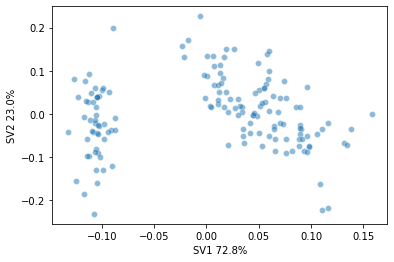

In [ ]:
sns.scatterplot(x="SV1", y="SV2",data=svd_df, alpha=0.5)
plt.xlabel('SV1 {0}%'.format(variance_explained[0] * 100))
plt.ylabel('SV2 {0}%'.format(variance_explained[1] * 100))

## TSNE

Shape before applying TSNE::  (150, 4)
Shape after applying TSNE::  (150, 2)


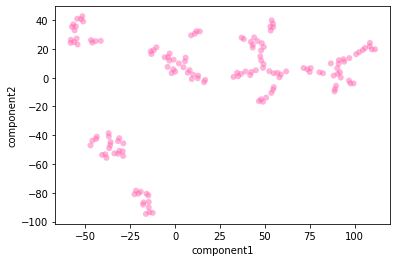

In [ ]:
from sklearn.manifold import TSNE
print("Shape before applying TSNE:: ", transformed_df.data.shape)
image_model = TSNE(n_components=2, random_state=0, perplexity=5, n_iter=5000)
tsne_image_result = image_model.fit_transform(transformed_df.data)
print("Shape after applying TSNE:: ", tsne_image_result.shape)

#Plotting the new dimensions
plt.scatter(tsne_image_result[:,0], tsne_image_result[:, 1], c="hotpink", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## IsoMap

Shape before applying Isomap::  (150, 4)
Shape after applying isomap::  (150, 2)


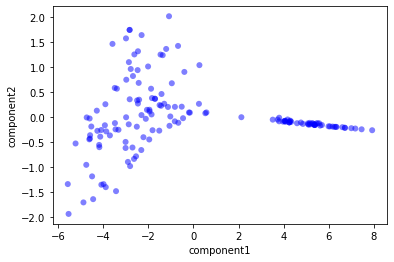

In [ ]:
from sklearn.manifold import Isomap
print("Shape before applying Isomap:: ", transformed_df.data.shape)
isomap = Isomap(n_neighbors=5, n_components=2)    
result_isomap_image = isomap.fit_transform(transformed_df.data)
print("Shape after applying isomap:: ", result_isomap_image.shape)
#Plotting the new dimensions
plt.scatter(result_isomap_image[:,0], result_isomap_image[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## LLE

Shape before applying LLE::  (150, 4)
Shape After applying LLE::  (150, 2)


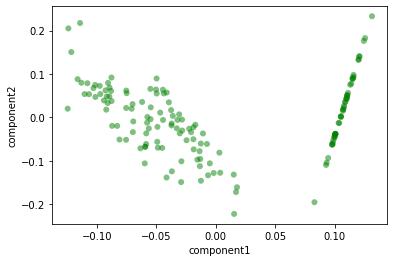

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
print("Shape before applying LLE:: ", transformed_df.data.shape)

lle = LLE(n_neighbors=30,n_components=2,eigen_solver='auto',method='standard',neighbors_algorithm='auto')
reduced_data = lle.fit_transform(transformed_df.data)

print("Shape After applying LLE:: ", reduced_data.shape)


#Plotting the new dimensions
plt.scatter(reduced_data[:,0], reduced_data[:, 1], c="green", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## Umap

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 31.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=1defbb0aae977693cbef2b5b7c55ddc6d267865879272bc35a03680781b92b1a
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=3967b6494f1ecf4634b0ca1b79296fea9d20e1d418ec374f3fd5af9e8412205a
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


Shape before applying UMAP::  (150, 4)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Shape after applying UMAP::  (150, 2)


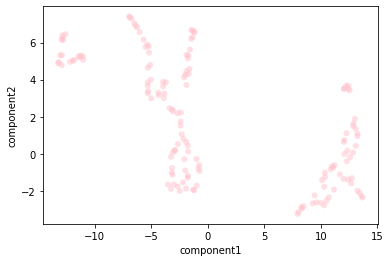

In [ ]:
import umap


print("Shape before applying UMAP:: ", transformed_df.data.shape)
umap_data_image = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(transformed_df.data)
print("Shape after applying UMAP:: ", umap_data_image.shape)

#Plotting the new dimensions
plt.scatter(umap_data_image[:,0], umap_data_image[:, 1], c="pink", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

# Image Data Set

In [ ]:
#Importing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading data set
from sklearn.datasets import load_digits
df = load_digits()
df.data.shape

(1797, 64)

In [ ]:
# Data Normalization
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)


## PCA

(1797, 64)
(1797, 2)


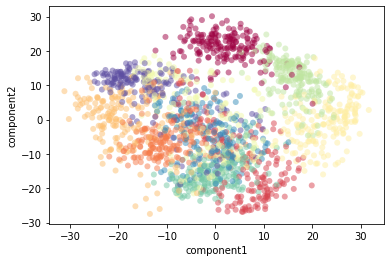

In [ ]:
# Applying PCA
pca = PCA(n_components=2)
updated_data = pca.fit_transform(df.data)
print(df.data.shape)
print(updated_data.shape)
#Plotting the data
plt.scatter(updated_data[:,0], updated_data[:, 1], c=df.target, edgecolors='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## SVD

(1797, 64)
[0.696 0.047 0.043 0.037 0.026 0.018 0.015 0.013 0.011 0.01  0.008 0.007
 0.006 0.006 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


,SV1,SV2
0,0.020911,-0.002103
1,0.025320,0.013866
2,0.025456,0.012195
3,0.020581,-0.028023
4,0.018577,0.041213


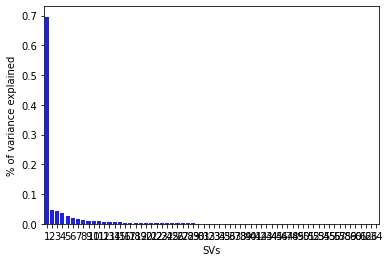

In [ ]:
print(df.data.shape)

#Applying SVD
u,s,v = np.linalg.svd(df.data, full_matrices=True)
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(variance_explained)

#Plotting the variance
sns.barplot(x=list(range(1, len(variance_explained) + 1)), y=variance_explained, color="blue")
plt.xlabel("SVs")
plt.ylabel("% of variance explained")

#Plotting the reduced data
col_lables = ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], columns=col_lables)
svd_df.head()

Text(0, 0.5, 'SV2 4.7%')

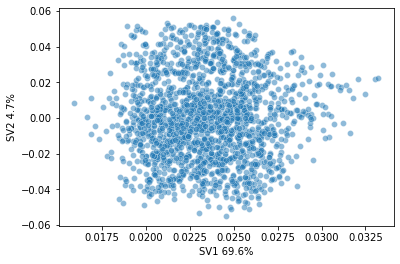

In [ ]:
sns.scatterplot(x="SV1", y="SV2",data=svd_df, alpha=0.5)
plt.xlabel('SV1 {0}%'.format(variance_explained[0] * 100))
plt.ylabel('SV2 {0}%'.format(variance_explained[1] * 100))

## TSNE

Shape before applying TSNE::  (1797, 64)
Shape after applying TSNE::  (1797, 2)


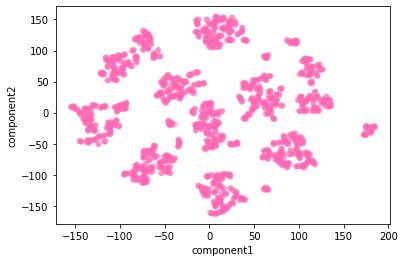

In [ ]:
from sklearn.manifold import TSNE
print("Shape before applying TSNE:: ", df.data.shape)
image_model = TSNE(n_components=2, random_state=0, perplexity=5, n_iter=5000)
tsne_image_result = image_model.fit_transform(df.data)
print("Shape after applying TSNE:: ", tsne_image_result.shape)

#Plotting the new dimensions
plt.scatter(tsne_image_result[:,0], tsne_image_result[:, 1], c="hotpink", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## IsoMap

Shape before applying Isomap::  (1797, 64)
Shape after applying isomap::  (1797, 2)


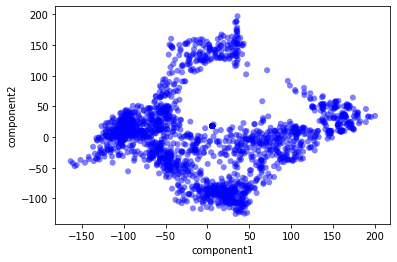

In [ ]:
from sklearn.manifold import Isomap
print("Shape before applying Isomap:: ", df.data.shape)
isomap = Isomap(n_neighbors=5, n_components=2)    
result_isomap_image = isomap.fit_transform(df.data)
print("Shape after applying isomap:: ", result_isomap_image.shape)
#Plotting the new dimensions
plt.scatter(result_isomap_image[:,0], result_isomap_image[:, 1], c="blue", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## LLE

Shape before applying LLE::  (1797, 64)
Shape After applying LLE::  (1797, 2)


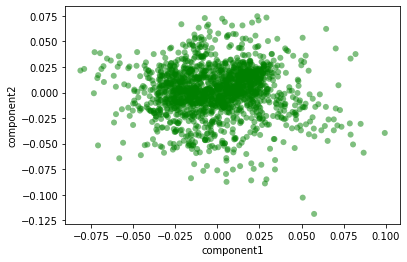

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
print("Shape before applying LLE:: ", df.data.shape)

lle = LLE(n_neighbors=30,n_components=2,eigen_solver='auto',method='standard',neighbors_algorithm='auto')
reduced_data = lle.fit_transform(df.data)

print("Shape After applying LLE:: ", reduced_data.shape)


#Plotting the new dimensions
plt.scatter(reduced_data[:,0], reduced_data[:, 1], c="green", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

## Umap

Shape before applying UMAP::  (1797, 64)
Shape after applying UMAP::  (1797, 2)


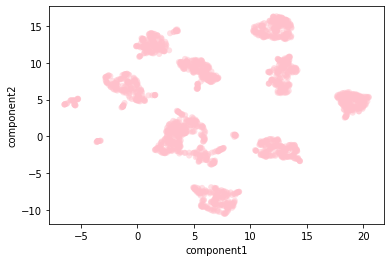

In [ ]:
import umap


print("Shape before applying UMAP:: ", df.data.shape)
umap_data_image = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(df.data)
print("Shape after applying UMAP:: ", umap_data_image.shape)

#Plotting the new dimensions
plt.scatter(umap_data_image[:,0], umap_data_image[:, 1], c="pink", edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')

plt.show()

# Analysis of the Dimensional Reduction Technologies

**PCA**

For Iris - tabular data : After plotting the data between first two dimensions after dimensionality reduction we will find that data is Linearly distributed and in 3 cluster

For Digits - Image Data : The image data is not Linearly distributed. It has uniform distribution


**SVD**

Iris - tabular data : The data seems similarly distributed as in PCA

Digits - Image Data : The data seems similarly distributed as in PCA

**TSNE**

Iris - tabular data : The data is distributed in the form of patches of neighboring points. The patches are better isolated then any of the algorithms.

Digits - Image Data : The data distribution is in the form of patches of neighboring points where patches are very well distributed and are not overlapping each other and patches are not centered at same location. The patches are better isolated then any of the algorithms.


**IsoMap**

Iris - tabular data : The data is scattered in two different clusters


Digits - Image Data : The data is distributed as patches of neighbor but most of them are clustered at center.


**LLE**

Iris - tabular data : The data distribution is similar to the Isomap;

Digits - Image Data : The data is densely located at the centre


**Umap**

Iris - tabular data : The data distribution is similar to TSNE map

Digits - Image Data : The Data distribution looks very similar to t-SNE where patches of neighboring points are well ditributed and not overlapping each other. The patches are not centered at same location.
